In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticks
import matplotlib.dates as mdates
plt.rcParams['figure.figsize'] = (12,3)

file ="Data/Starting_Data.csv"
df = pd.read_csv(file)
df

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
0,1311732,01/01/2001 01:00:00 PM,PUBLIC PEACE VIOLATION,ARSON THREAT,RESIDENCE,False,False,1433,14.0,NaN,41.905753,-87.666380
1,3769790,01/01/2001 01:00:00 PM,THEFT,AGG: FINANCIAL ID THEFT,RESIDENCE,False,False,523,5.0,34.0,41.673171,-87.638000
2,1317380,01/01/2001 01:00:00 PM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,911,9.0,NaN,41.807498,-87.689155
3,1324743,01/01/2001 01:00:00 PM,GAMBLING,ILLEGAL ILL LOTTERY,STREET,True,False,313,3.0,NaN,41.780412,-87.611970
4,1427622,01/01/2001 01:00:00 PM,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False,2521,25.0,NaN,41.929707,-87.739828
...,...,...,...,...,...,...,...,...,...,...,...,...
7730204,12969478,02/01/2023 12:50:00 AM,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,231,2.0,3.0,41.796006,-87.620879
7730205,12970000,02/01/2023 12:53:00 PM,BATTERY,AGGRAVATED DOMESTIC BATTERY - KNIFE / CUTTING ...,RESIDENCE,False,True,1633,16.0,30.0,41.940424,-87.764950
7730206,12969899,02/01/2023 12:53:00 PM,NARCOTICS,MANUFACTURE / DELIVER - CANNABIS OVER 10 GRAMS,ALLEY,True,False,1532,15.0,37.0,41.889537,-87.749000
7730207,12971229,02/01/2023 12:54:00 PM,THEFT,$500 AND UNDER,RESIDENCE - PORCH / HALLWAY,False,False,212,2.0,3.0,41.830027,-87.620528


In [3]:
def summarize_df(df_):
    df = df_.copy()
    report = pd.DataFrame({
                        'dtype':df.dtypes,
                        '# null': df.isna().sum(),
                        'null (%)': df.isna().sum()/len(df)*100,
                        'nunique':df.nunique(),
                        "min":df.min(),
                        'max':df.max()
             })
    report.index.name='Column'
    return report.reset_index()
summarize_df(df)

C:\Users\staichn\AppData\Local\Temp\ipykernel_19052\861501889.py:8: FutureWarning: The default value of numeric_only in DataFrame.min is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  "min":df.min(),
C:\Users\staichn\AppData\Local\Temp\ipykernel_19052\861501889.py:9: FutureWarning: The default value of numeric_only in DataFrame.max is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  'max':df.max()


,Column,dtype,# null,null (%),nunique,min,max
0,Arrest,bool,0,0.000000,2,False,True
1,Beat,int64,0,0.000000,304,111,2535
2,Date,object,0,0.000000,3181543,01/01/2001 01:00:00 AM,12/31/2022 12:59:00 PM
3,Description,object,0,0.000000,543,$300 AND UNDER,WIREROOM/SPORTS
4,District,float64,47,0.000608,24,1.0,31.0
5,Domestic,bool,0,0.000000,2,False,True
6,ID,int64,0,0.000000,7730209,634,12976545
7,Latitude,float64,84515,1.093308,887828,36.619446,42.02291
8,Location Description,object,10023,0.129660,215,NaN,NaN
9,Longitude,float64,84515,1.093308,887241,-91.686566,-87.524529


In [4]:
df['Date'] = pd.to_datetime(df['Date'])
df['Date']

0         2001-01-01 13:00:00
1         2001-01-01 13:00:00
2         2001-01-01 13:00:00
3         2001-01-01 13:00:00
4         2001-01-01 13:00:00
                  ...        
7730204   2023-02-01 00:50:00
7730205   2023-02-01 12:53:00
7730206   2023-02-01 12:53:00
7730207   2023-02-01 12:54:00
7730208   2023-02-01 12:57:00
Name: Date, Length: 7730209, dtype: datetime64[ns]

In [5]:
chrono_df = df.set_index('Date')
chrono_df.info()
chrono_df

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7730209 entries, 2001-01-01 13:00:00 to 2023-02-01 12:57:00
Data columns (total 11 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Primary Type          object 
 2   Description           object 
 3   Location Description  object 
 4   Arrest                bool   
 5   Domestic              bool   
 6   Beat                  int64  
 7   District              float64
 8   Ward                  float64
 9   Latitude              float64
 10  Longitude             float64
dtypes: bool(2), float64(4), int64(2), object(3)
memory usage: 604.5+ MB


,ID,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
Date,,,,,,,,,,,
2001-01-01 13:00:00,1311732,PUBLIC PEACE VIOLATION,ARSON THREAT,RESIDENCE,False,False,1433,14.0,NaN,41.905753,-87.666380
2001-01-01 13:00:00,3769790,THEFT,AGG: FINANCIAL ID THEFT,RESIDENCE,False,False,523,5.0,34.0,41.673171,-87.638000
2001-01-01 13:00:00,1317380,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,911,9.0,NaN,41.807498,-87.689155
2001-01-01 13:00:00,1324743,GAMBLING,ILLEGAL ILL LOTTERY,STREET,True,False,313,3.0,NaN,41.780412,-87.611970
2001-01-01 13:00:00,1427622,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False,2521,25.0,NaN,41.929707,-87.739828
...,...,...,...,...,...,...,...,...,...,...,...
2023-02-01 00:50:00,12969478,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,231,2.0,3.0,41.796006,-87.620879
2023-02-01 12:53:00,12970000,BATTERY,AGGRAVATED DOMESTIC BATTERY - KNIFE / CUTTING ...,RESIDENCE,False,True,1633,16.0,30.0,41.940424,-87.764950
2023-02-01 12:53:00,12969899,NARCOTICS,MANUFACTURE / DELIVER - CANNABIS OVER 10 GRAMS,ALLEY,True,False,1532,15.0,37.0,41.889537,-87.749000


In [6]:
chrono_df.index

DatetimeIndex(['2001-01-01 13:00:00', '2001-01-01 13:00:00',
               '2001-01-01 13:00:00', '2001-01-01 13:00:00',
               '2001-01-01 13:00:00', '2001-01-01 13:00:00',
               '2001-01-01 01:00:00', '2001-01-01 01:00:00',
               '2001-01-01 13:00:00', '2001-01-01 01:00:00',
               ...
               '2023-02-01 12:37:00', '2023-02-01 12:40:00',
               '2023-02-01 12:41:00', '2023-02-01 00:43:00',
               '2023-02-01 12:45:00', '2023-02-01 00:50:00',
               '2023-02-01 12:53:00', '2023-02-01 12:53:00',
               '2023-02-01 12:54:00', '2023-02-01 12:57:00'],
              dtype='datetime64[ns]', name='Date', length=7730209, freq=None)

In [7]:
#Quick Function for EDA analysis (proper EDA should still be conducted)

def summarize_df(df_):
    df = df_.copy()
    report = pd.DataFrame({
        'dtype':df.dtypes,
        '# null': df.isna().sum(),
        'null %': df.isna().sum()/len(df)*100,
        'nunique': df.nunique(),
        'min':df.min(),
        'max':df.max()        
    })
    report.index.name='Column'
    return report.reset_index()
summarize_df(chrono_df)

C:\Users\staichn\AppData\Local\Temp\ipykernel_19052\3464280240.py:10: FutureWarning: The default value of numeric_only in DataFrame.min is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  'min':df.min(),
C:\Users\staichn\AppData\Local\Temp\ipykernel_19052\3464280240.py:11: FutureWarning: The default value of numeric_only in DataFrame.max is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  'max':df.max()


,Column,dtype,# null,null %,nunique,min,max
0,Arrest,bool,0,0.000000,2,False,True
1,Beat,int64,0,0.000000,304,111,2535
2,Description,object,0,0.000000,543,$300 AND UNDER,WIREROOM/SPORTS
3,District,float64,47,0.000608,24,1.0,31.0
4,Domestic,bool,0,0.000000,2,False,True
5,ID,int64,0,0.000000,7730209,634,12976545
6,Latitude,float64,84515,1.093308,887828,36.619446,42.02291
7,Location Description,object,10023,0.129660,215,NaN,NaN
8,Longitude,float64,84515,1.093308,887241,-91.686566,-87.524529
9,Primary Type,object,0,0.000000,36,ARSON,WEAPONS VIOLATION


# 1) Comparing Police Districts:

* Which district has the most crimes? Which has the least?

In [17]:
district_df = chrono_df.groupby('District').nunique()
district_df

,ID,Primary Type,Description,Location Description,Arrest,Domestic,Beat,Ward,Latitude,Longitude
District,,,,,,,,,,
1.0,311703,33,422,155,2,2,37,14,17045,17045
2.0,365727,35,438,161,2,2,46,16,35147,35142
3.0,392062,34,444,160,2,2,36,10,31402,31423
4.0,438849,35,447,153,2,2,27,10,51260,51212
5.0,342882,35,431,155,2,2,26,14,41038,41041
6.0,451823,33,444,152,2,2,39,13,42112,42128
7.0,448029,32,435,154,2,2,36,13,40245,40246
8.0,519631,33,446,159,2,2,37,18,76881,76884
9.0,378014,34,440,147,2,2,47,17,52741,52759


In [18]:
dist_hist = district_df.sort_values('ID', ascending = False)
dist_hist

,ID,Primary Type,Description,Location Description,Arrest,Domestic,Beat,Ward,Latitude,Longitude
District,,,,,,,,,,
8.0,519631,33,446,159,2,2,37,18,76881,76884
11.0,496623,35,466,156,2,2,37,11,39859,39870
6.0,451823,33,444,152,2,2,39,13,42112,42128
7.0,448029,32,435,154,2,2,36,13,40245,40246
25.0,439998,33,451,142,2,2,38,20,58581,58601
4.0,438849,35,447,153,2,2,27,10,51260,51212
3.0,392062,34,444,160,2,2,36,10,31402,31423
12.0,382361,33,454,153,2,2,64,25,49736,49732
9.0,378014,34,440,147,2,2,47,17,52741,52759


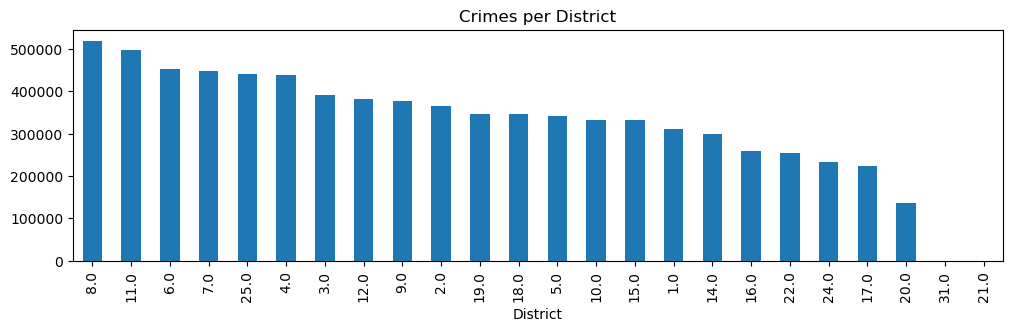

In [26]:
ax = dist_hist['ID'].plot.bar(title = 'Crimes per District')

There is an interesting distribution of crime across Chicago when looking at the total dataset from 2001 to 2023.  The District with the highest number of crimes in that period is the 8th District with 519,631 crimes.  The district with the least number of crimes is the 21st District with 4.  

This last data point seems suspect statistically, as does the low number of crimes reported in the 31st District (232 crimes since 2001). Considering the overall crime volumes throughout the city over the period, it would be unlikely for two districts to report such low crime levels.  It seems that the district with the most reliable numbers relative to the rest of the city for the lowest crime volume is the 20th District with 136,505 crimes. 

# 2) Crimes Across the Years:
* Is the total number of crimes increasing or decreasing across the years?

* Are there any individual crimes that are doing the opposite (e.g decreasing when overall crime is increasing or vice-versa)?

In [10]:
district_df = chrono_df.groupby('District').resample('Y').sum('id')
district_df

C:\Users\staichn\AppData\Local\Temp\ipykernel_19052\769078904.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  district_df = chrono_df.groupby('District').resample('Y').sum()
C:\Users\staichn\AppData\Local\Temp\ipykernel_19052\769078904.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  district_df = chrono_df.groupby('District').resample('Y').sum()
C:\Users\staichn\AppData\Local\Temp\ipykernel_19052\769078904.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only colu

C:\Users\staichn\AppData\Local\Temp\ipykernel_19052\769078904.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  district_df = chrono_df.groupby('District').resample('Y').sum()


ID  Arrest  Domestic     Beat  District  \
District Date                                                           
1.0      2001-12-31  24302919537    4420       469  1840105   14861.0   
         2002-12-31  40208821903    6226       963  7609713   17974.0   
         2003-12-31  49739691659    6603       845  5959056   17571.0   
         2004-12-31  60480353024    6501       757  6656934   17579.0   
         2005-12-31  73405359944    7224       780  7540512   17700.0   
...                          ...     ...       ...      ...       ...   
31.0     2019-12-31     83169442       1         0    11491     217.0   
         2020-12-31     48381476       1         1     6614     124.0   
         2021-12-31    186523581       4         2    23569     465.0   
         2022-12-31    101584614       2         0    13187     248.0   
         2023-12-31     38848253       1         0     4962      93.0   

                         Ward       Latitude     Longitude  
District Date                                               
1.0      2001-12-31    3337.0  611376.898507 -1.279313e+06  
         2002-12-31  240129.0  729511.040232 -1.526759e+06  
         2003-12-31  313211.0  728794.301662 -1.525269e+06  
         2004-12-31  308895.0  733422.748422 -1.534987e+06  
         2005-12-31  287942.0  733396.753264 -1.534983e+06  
...                       ...            ...           ...  
31.0     2019-12-31     287.0     293.874212 -6.150893e+02  
         2020-12-31     164.0     167.921493 -3.515420e+02  
         2021-12-31     581.0     629.688603 -1.318413e+03  
         2022-12-31     328.0     335.904195 -7.031414e+02  
         2023-12-31     123.0     126.008199 -2.637404e+02  

[530 rows x 8 columns]

In [1]:
ax = district_df.plot(style='.-')

NameError: name 'district_df' is not defined

# 4) Comparing Months:

* What months have the most crime? What months have the least?

* Are there any individual crimes that do not follow this pattern? If so, which crimes?